# **NN , CNN and TABNET for Anomaly Detection Wallet   DATASET**

**Elliptic Data Set**

https://github.com/git-disl/EllipticPlusPlus?tab=readme-ov-file

https://drive.google.com/drive/folders/1MRPXz79Lu_JGLlJ21MDfML44dKN9R08l

[2] M. Weber, G. Domeniconi, J. Chen, D. K. I. Weidele, C. Bellei, T. Robinson, C. E. Leiserson, "Anti-Money Laundering in Bitcoin: Experimenting with Graph Convolutional Networks for Financial Forensics", KDD ’19 Workshop on Anomaly Detection in Finance, August 2019, Anchorage, AK, USA.


In [ ]:
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
file_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/wallets_features_classes_combined.csv'
df1 = pd.read_csv(file_path, sep=',')
df1.head()
# Check unique values in the target column
print("Unique values before modification:", df1['class'].unique())

# Map the target values: 1 -> 0, 2 -> 1, and drop rows with value 3
df1 = df1[df1['class'] != 3]  # Filter out rows where target is 3
df1['class'] = df1['class'].map({1: 0, 2: 1})

# Verify the changes
print("Unique values after modification:", df1['class'].unique())
print(f"Dataset shape after filtering: {df1.shape}")

# Features (all columns except target)
X = df1.drop(columns=['class'])
y = df1['class']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=10, stratify=y
)

# Check the class distribution in the training and testing sets
print("Class distribution in training set:", y_train.value_counts())
print("Class distribution in testing set:", y_test.value_counts())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Unique values before modification: [2 3 1]
Unique values after modification: [1 0]
Dataset shape after filtering: (367472, 58)
Class distribution in training set: class
1    271096
0     22881
Name: count, dtype: int64
Class distribution in testing set: class
1    67775
0     5720
Name: count, dtype: int64


# **Train a Neural Network (NN)**

In [ ]:
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Scale the numeric features
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
file_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/wallets_features_classes_combined.csv'
df1 = pd.read_csv(file_path, sep=',')
df1.head()
# Check unique values in the target column
print("Unique values before modification:", df1['class'].unique())

# Map the target values: 1 -> 0, 2 -> 1, and drop rows with value 3
df1 = df1[df1['class'] != 3]  # Filter out rows where target is 3
df1['class'] = df1['class'].map({1: 0, 2: 1})

# Verify the changes
print("Unique values after modification:", df1['class'].unique())
print(f"Dataset shape after filtering: {df1.shape}")



# Features (all columns except target)
X = df1.drop(columns=['class'])
y = df1['class']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=10, stratify=y
)
# Drop or encode the address column
X_train = X_train.drop(columns=['address'])  # or encode it using LabelEncoder as shown above
X_test = X_test.drop(columns=['address'])

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and train the model
nn_model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_nn = nn_model.fit(X_train, y_train, epochs=16, batch_size=32, validation_split=0.2)

# Evaluate the model
nn_loss, nn_acc = nn_model.evaluate(X_test, y_test)
print(f"NN Accuracy: {nn_acc * 100:.2f}%")
# Save the fine-tuned Bitcoin model
nn_model_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/nn_wallet_model.h5'
nn_model.save(nn_model_path)
print(f"Fine-tuned Bitcoin model saved to: {nn_model_path}")

# Generate predictions
y_pred_prob = nn_model.predict(X_test).ravel()  # Get probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal', 'Anomaly'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix Fine-Tuned on Wallet NN Model')
plt.show()

# Calculate precision, recall, F1-score, accuracy, and ROC AUC
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Use probabilities for ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Compute ROC curve and ROC AUC for testing data
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_prob)
roc_auc_test = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_test, tpr_test, label=f'Testing ROC curve (AUC = {roc_auc_test:.4f})', color='red')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line

# Labels and legend
plt.title('ROC Curve for Fine-Tuned on Wallet NN Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Unique values before modification: [2 3 1]
Unique values after modification: [1 0]
Dataset shape after filtering: (367472, 58)
Epoch 1/16
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9348 - loss: 0.1857 - val_accuracy: 0.9504 - val_loss: 0.1336
Epoch 2/16
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9488 - loss: 0.1435 - val_accuracy: 0.9529 - val_loss: 0.1272
Epoch 3/16
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9509 - loss: 0.1360 - val_accuracy: 0.9581 - val_loss: 0.1176
Epoch 4/16
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9547 - loss: 0.1272 - val_accuracy: 0.9563 - val_loss: 0.1162
Epoch 5/16
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9548 - loss: 0.1270 - val_accuracy: 0.9585 - val_loss: 0.1167
Epoch 6/16
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9556 - loss: 0.1229 

# **Train a Convolutional Neural Network (CNN)**


Epoch 1/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9361 - loss: 0.1796 - val_accuracy: 0.9496 - val_loss: 0.1373
Epoch 2/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9495 - loss: 0.1383 - val_accuracy: 0.9497 - val_loss: 0.1384
Epoch 3/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9527 - loss: 0.1295 - val_accuracy: 0.9563 - val_loss: 0.1194
Epoch 4/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9552 - loss: 0.1226 - val_accuracy: 0.9534 - val_loss: 0.1207
Epoch 5/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9564 - loss: 0.1193 - val_accuracy: 0.9608 - val_loss: 0.1155
Epoch 6/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9578 - loss: 0.1170 - val_accuracy: 0.9606 - val_loss: 0.1121
Epoch 7/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9595 - loss: 0.1142 - val_accuracy: 0.9615 - val_loss: 0.1085
Epoch 8/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9609 - loss: 0

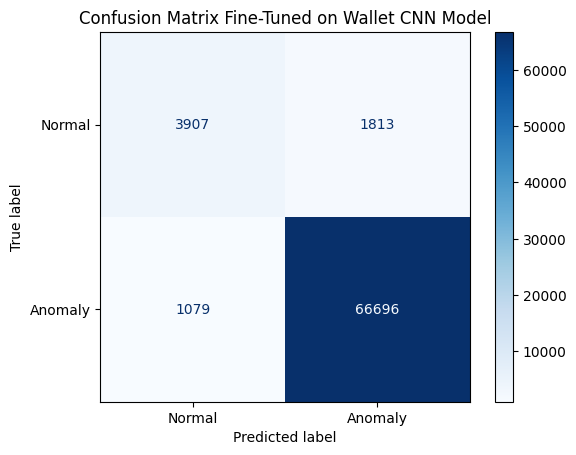

Accuracy: 0.9607
Precision: 0.9735
Recall: 0.9841
F1 Score: 0.9788
ROC AUC: 0.9651


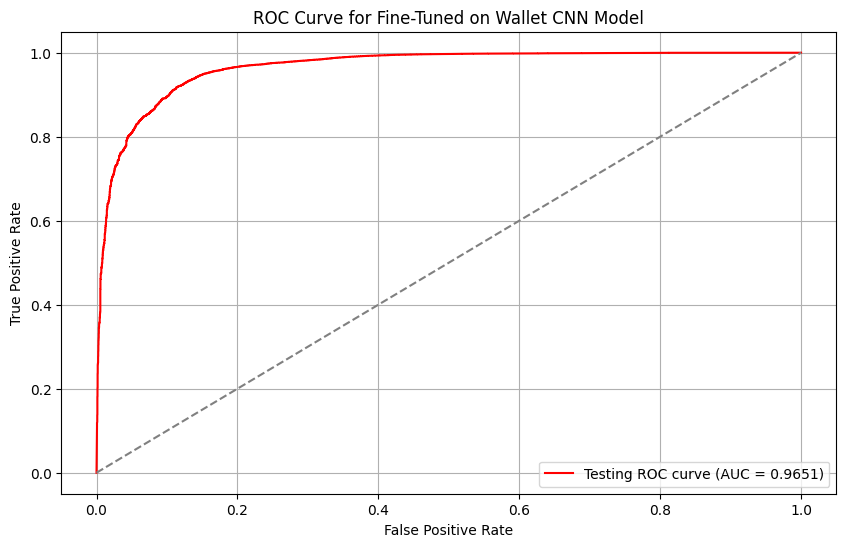

In [ ]:
# Reshape for Conv1D
X_train_reshaped = X_train.reshape(-1, X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(-1, X_test.shape[1], 1)

# Build a Conv1D model
cnn_model = models.Sequential([
    layers.Conv1D(32, 3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_cnn = cnn_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
cnn_loss, cnn_acc = cnn_model.evaluate(X_test_reshaped, y_test)
print(f"CNN Accuracy: {cnn_acc * 100:.2f}%")

# Generate predictions
y_pred_prob = cnn_model.predict(X_test).ravel()  # Get probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal', 'Anomaly'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix Fine-Tuned on Wallet CNN Model')
plt.show()

# Calculate precision, recall, F1-score, accuracy, and ROC AUC
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Use probabilities for ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Compute ROC curve and ROC AUC for testing data
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_prob)
roc_auc_test = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_test, tpr_test, label=f'Testing ROC curve (AUC = {roc_auc_test:.4f})', color='red')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line

# Labels and legend
plt.title('ROC Curve for Fine-Tuned on Wallet CNN Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


#  **Train TabNet**

In [ ]:
!pip install pytorch-tabnet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.1 MB/s eta 0:00:00


In [ ]:
pip install --upgrade pytorch-tabnet


epoch 0  | loss: 0.22845 | val_0_accuracy: 0.92249 | val_1_accuracy: 0.9227  |  0:00:28s
epoch 1  | loss: 0.17224 | val_0_accuracy: 0.92278 | val_1_accuracy: 0.9228  |  0:00:55s
epoch 2  | loss: 0.16234 | val_0_accuracy: 0.93062 | val_1_accuracy: 0.93085 |  0:01:21s
epoch 3  | loss: 0.1542  | val_0_accuracy: 0.92567 | val_1_accuracy: 0.9258  |  0:01:48s
epoch 4  | loss: 0.14993 | val_0_accuracy: 0.93002 | val_1_accuracy: 0.93014 |  0:02:15s
epoch 5  | loss: 0.14635 | val_0_accuracy: 0.93381 | val_1_accuracy: 0.93371 |  0:02:41s
epoch 6  | loss: 0.14194 | val_0_accuracy: 0.94227 | val_1_accuracy: 0.94168 |  0:03:08s
epoch 7  | loss: 0.13948 | val_0_accuracy: 0.93777 | val_1_accuracy: 0.93763 |  0:03:35s
epoch 8  | loss: 0.13687 | val_0_accuracy: 0.93198 | val_1_accuracy: 0.93216 |  0:04:02s
epoch 9  | loss: 0.13556 | val_0_accuracy: 0.93073 | val_1_accuracy: 0.9311  |  0:04:29s
epoch 10 | loss: 0.13321 | val_0_accuracy: 0.9444  | val_1_accuracy: 0.94421 |  0:04:55s
epoch 11 | loss: 0.12

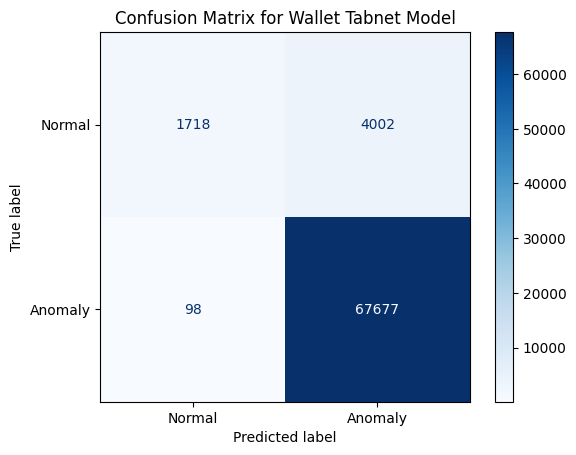

Accuracy: 0.9442
Precision: 0.9442
Recall: 0.9986
F1 Score: 0.9706
ROC AUC: 0.9434
Successfully saved model at content/drive/MyDrive/BlockChainAnomaly/Data/tabnet_wallet_model.zip


In [ ]:
import pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetClassifier

# Initialize TabNetClassifier
tabnet_model = TabNetClassifier()

# Train the TabNet model
tabnet_model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_metric=['accuracy'],
    max_epochs=20,
    patience=5,
    batch_size=1024,
    virtual_batch_size=64
)

# Predict and evaluate
y_pred_tabnet = tabnet_model.predict(X_test)
print(classification_report(y_test, y_pred_tabnet))


# Evaluate the model on the Wallet Test Dataset
y_pred_tabnet = tabnet_model.predict(X_test)

# Print evaluation results
print("Classification Report on Wallet Dataset:")
print(classification_report(y_test, y_pred_tabnet))

print("Confusion Matrix on Wallet Dataset:")
conf_matrix = confusion_matrix(y_test, y_pred_tabnet)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal', 'Anomaly'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Wallet Tabnet Model')
plt.show()

# Calculate additional metrics
precision = precision_score(y_test, y_pred_tabnet)
recall = recall_score(y_test, y_pred_tabnet)
f1 = f1_score(y_test, y_pred_tabnet)
accuracy = accuracy_score(y_test, y_pred_tabnet)

# Use probabilities for ROC AUC
y_pred_proba = tabnet_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print detailed metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Save the model
model_path = 'content/drive/MyDrive/BlockChainAnomaly/Data/tabnet_wallet_model'
tabnet_model.save_model(model_path)

# Load the model for further use if needed
tabnet_model.load_model(model_path + '.zip')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Evaluate the model
y_pred = tabnet_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Save the model
model_path = 'content/drive/MyDrive/BlockChainAnomaly/Data/tabnet_wallet_model'
tabnet_model.save_model(model_path)

# Load the model
tabnet_model_loaded = TabNetClassifier()
tabnet_model_loaded.load_model(model_path + '.zip')



Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.30      0.46      5720
           1       0.94      1.00      0.97     67775

    accuracy                           0.94     73495
   macro avg       0.95      0.65      0.71     73495
weighted avg       0.94      0.94      0.93     73495

Confusion Matrix:
[[ 1718  4002]
 [   98 67677]]
Accuracy: 0.9442
Successfully saved model at content/drive/MyDrive/BlockChainAnomaly/Data/tabnet_wallet_model.zip


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.30      0.46      5720
           1       0.94      1.00      0.97     67775

    accuracy                           0.94     73495
   macro avg       0.95      0.65      0.71     73495
weighted avg       0.94      0.94      0.93     73495

Confusion Matrix:
[[ 1718  4002]
 [   98 67677]]
Accuracy: 0.9442
Successfully saved model at content/drive/MyDrive/BlockChainAnomaly/Data/tabnet_wallet_model.zip


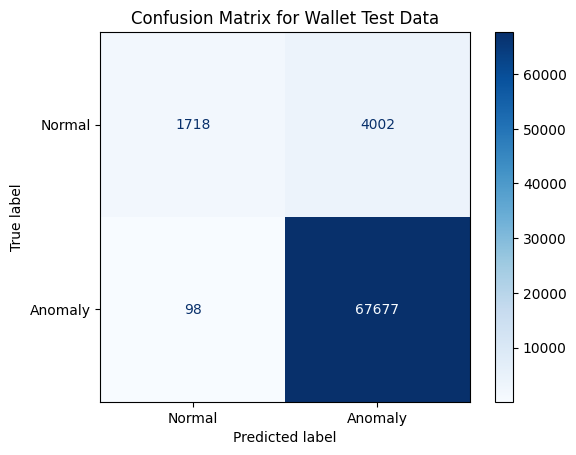

Confusion Matrix:
[[ 1718  4002]
 [   98 67677]]
Accuracy: 0.9442
Precision: 0.9442
Recall: 0.9986
F1 Score: 0.9706
ROC AUC: 0.9434


In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    roc_auc_score
)
import matplotlib.pyplot as plt

# Evaluate the model
y_pred = tabnet_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Save the model
model_path = 'content/drive/MyDrive/BlockChainAnomaly/Data/tabnet_wallet_model'
tabnet_model.save_model(model_path)

# Load the model
tabnet_model_loaded = TabNetClassifier()
tabnet_model_loaded.load_model(model_path + '.zip')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal', 'Anomaly'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Wallet Test Data')
plt.show()

# Print confusion matrix values
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, F1-score, accuracy, and ROC AUC
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Use probabilities for ROC AUC (assuming `predict_proba` returns scores)
y_pred_proba = tabnet_model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


# **Visualize and Compare Results**

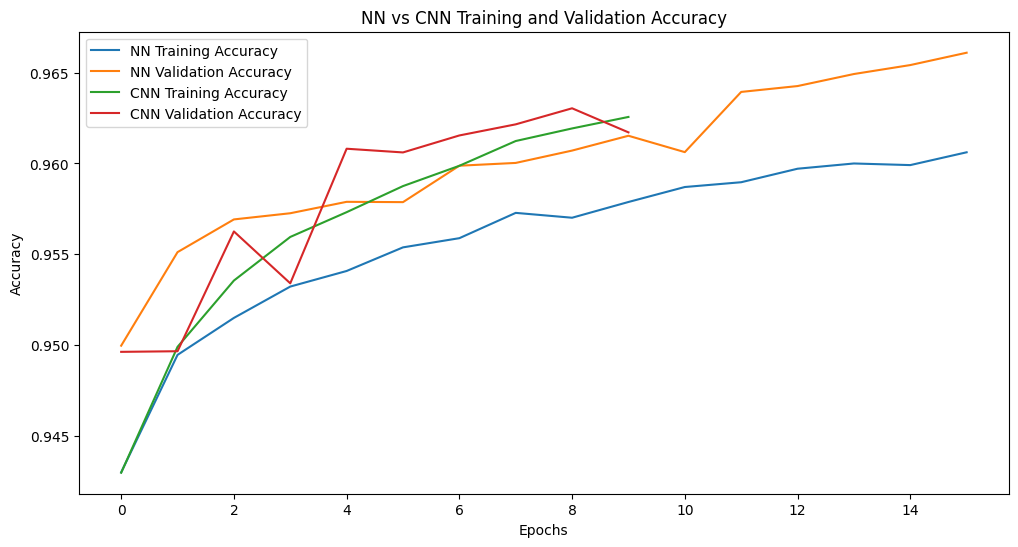

In [ ]:
# Plot training accuracy for NN and CNN
plt.figure(figsize=(12, 6))
plt.plot(history_nn.history['accuracy'], label='NN Training Accuracy')
plt.plot(history_nn.history['val_accuracy'], label='NN Validation Accuracy')
plt.plot(history_cnn.history['accuracy'], label='CNN Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('NN vs CNN Training and Validation Accuracy')
plt.legend()
plt.show()


# **Saving Models and Histories**

In [ ]:
import numpy as np
import pickle
from tensorflow.keras import models, layers
from tensorflow.keras.models import load_model
from pytorch_tabnet.tab_model import TabNetClassifier

# Define the path for saving models
save_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/'

# =========================================
# Saving Models and Histories
# =========================================

# NN Model
nn_model.save(save_path + 'nn_wallet_model.h5')  # Save entire NN model
#nn_model.save_weights(save_path + 'nn_weights.h5')  # Save only weights
#nn_model.save(save_path + 'nn_saved_model')  # Save in SavedModel format

# CNN Model
cnn_model.save(save_path + 'cnn_wallet_model.h5')  # Save entire CNN model
#cnn_model.save_weights(save_path + 'cnn_weights.h5')  # Save only weights
#cnn_model.save(save_path + 'cnn_saved_model')  # Save in SavedModel format

# TabNet Model
tabnet_model.save_model(save_path + 'tabnet_wallet_model')  # Save TabNet model

# NN and CNN Histories
with open(save_path + 'nn_wallet_history.pkl', 'wb') as file:
    pickle.dump(history_nn.history, file)

with open(save_path + 'cnn_wallet_history.pkl', 'wb') as file:
    pickle.dump(history_cnn.history, file)

# TabNet History
np.save(save_path + 'tabnet_wallet_loss_history.npy', tabnet_model.history)

# =========================================
# Loading Models and Histories
# =========================================

# NN Model
nn_model_loaded = load_model(save_path + 'nn_wallet_model.h5')  # Load entire NN model
#nn_model.load_weights(save_path + 'nn_weights.h5')  # Load NN weights
#nn_model_loaded_saved_format = load_model(save_path + 'nn_saved_model')  # Load SavedModel format

# CNN Model
cnn_model_loaded = load_model(save_path + 'cnn_wallet_model.h5')  # Load entire CNN model
#cnn_model.load_weights(save_path + 'cnn_weights.h5')  # Load CNN weights
#cnn_model_loaded_saved_format = load_model(save_path + 'cnn_saved_model')  # Load SavedModel format

# TabNet Model
tabnet_model_loaded = TabNetClassifier()
tabnet_model_loaded.load_model(save_path + 'tabnet_wallet_model.zip')  # Load TabNet model

# NN and CNN Histories
with open(save_path + 'nn_wallet_history.pkl', 'rb') as file:
    nn_history = pickle.load(file)

with open(save_path + 'cnn_wallet_history.pkl', 'rb') as file:
    cnn_history = pickle.load(file)

# TabNet History
tabnet_history = np.load(save_path + 'tabnet_wallet_loss_history.npy', allow_pickle=True)

# =========================================
# Print Confirmation
# =========================================
print("Models and training histories saved and loaded successfully!")


Successfully saved model at /content/drive/MyDrive/BlockChainAnomaly/Data/tabnet_wallet_model.zip


Models and training histories saved and loaded successfully!


# **Transfer Learining from Ehtererum Dataset**

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier

# Load pretrained model
tabnet_model_loaded.load_model('/content/drive/MyDrive/BlockChainAnomaly/Data/tabnet_Ethereum_model.zip')


epoch 0  | loss: 0.2033  | val_0_accuracy: 0.92926 | val_1_accuracy: 0.92929 |  0:00:26s
epoch 1  | loss: 0.16021 | val_0_accuracy: 0.93212 | val_1_accuracy: 0.93219 |  0:00:53s
epoch 2  | loss: 0.15414 | val_0_accuracy: 0.93671 | val_1_accuracy: 0.93654 |  0:01:20s
epoch 3  | loss: 0.15038 | val_0_accuracy: 0.93861 | val_1_accuracy: 0.93877 |  0:01:46s
epoch 4  | loss: 0.14622 | val_0_accuracy: 0.94698 | val_1_accuracy: 0.94687 |  0:02:13s
epoch 5  | loss: 0.14243 | val_0_accuracy: 0.9392  | val_1_accuracy: 0.9393  |  0:02:40s
epoch 6  | loss: 0.13919 | val_0_accuracy: 0.93779 | val_1_accuracy: 0.93771 |  0:03:07s
epoch 7  | loss: 0.13448 | val_0_accuracy: 0.92941 | val_1_accuracy: 0.92978 |  0:03:34s
epoch 8  | loss: 0.13246 | val_0_accuracy: 0.92773 | val_1_accuracy: 0.92797 |  0:04:01s
epoch 9  | loss: 0.12913 | val_0_accuracy: 0.93064 | val_1_accuracy: 0.93121 |  0:04:27s

Early stopping occurred at epoch 9 with best_epoch = 4 and best_val_1_accuracy = 0.94687
Classification Repor

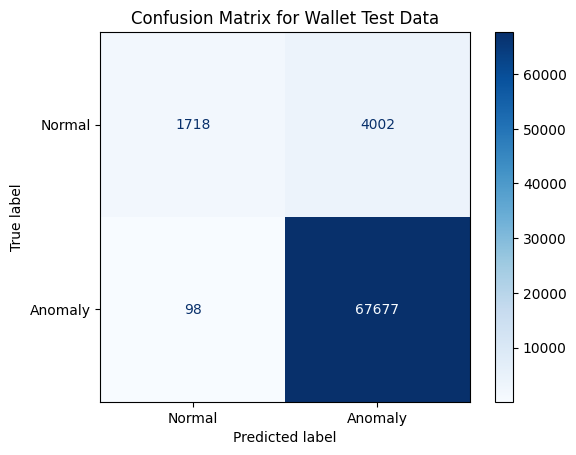

Confusion Matrix:
[[ 1718  4002]
 [   98 67677]]
Accuracy: 0.9442
Precision: 0.9442
Recall: 0.9986
F1 Score: 0.9706
ROC AUC: 0.9434


In [ ]:
#Fine-tuning on Ethereum dataset
tabnet_model_loaded.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_metric=['accuracy'],
    max_epochs=10,  # Set a higher number for training
    patience=5,  # Early stopping after 10 epochs with no improvement
    batch_size=1024,  # Batch size for the fine-tuning process
    virtual_batch_size=64  # Virtual batch size for stability during training
)

# After fine-tuning, you can evaluate the model on the test set (wallet dataset)
y_pred_wallet = tabnet_model_loaded.predict(X_test)

# Print evaluation results
print("Classification Report on wallet Dataset:")
print(classification_report(y_test, y_pred_wallet))

print("Confusion Matrix on wallet Dataset:")
print(confusion_matrix(y_test, y_pred_wallet))

print(f"Accuracy on wallet Dataset: {accuracy_score(y_test, y_pred_wallet):.4f}")

from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    roc_auc_score
)
import matplotlib.pyplot as plt

# Evaluate the model
y_pred = tabnet_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Save the model
model_path = 'content/drive/MyDrive/BlockChainAnomaly/Data/tabnet_wallet_model'
tabnet_model.save_model(model_path)

# Load the model
tabnet_model_loaded = TabNetClassifier()
tabnet_model_loaded.load_model(model_path + '.zip')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal', 'Anomaly'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Wallet Test Data')
plt.show()

# Print confusion matrix values
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, F1-score, accuracy, and ROC AUC
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Use probabilities for ROC AUC (assuming `predict_proba` returns scores)
y_pred_proba = tabnet_model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

epoch 0  | loss: 0.2033  | val_0_accuracy: 0.92926 | val_1_accuracy: 0.92929 |  0:00:27s
epoch 1  | loss: 0.16021 | val_0_accuracy: 0.93212 | val_1_accuracy: 0.93219 |  0:00:54s
epoch 2  | loss: 0.15414 | val_0_accuracy: 0.93671 | val_1_accuracy: 0.93654 |  0:01:21s
epoch 3  | loss: 0.15038 | val_0_accuracy: 0.93861 | val_1_accuracy: 0.93877 |  0:01:49s
epoch 4  | loss: 0.14622 | val_0_accuracy: 0.94698 | val_1_accuracy: 0.94687 |  0:02:16s
epoch 5  | loss: 0.14243 | val_0_accuracy: 0.9392  | val_1_accuracy: 0.9393  |  0:02:43s
epoch 6  | loss: 0.13919 | val_0_accuracy: 0.93779 | val_1_accuracy: 0.93771 |  0:03:10s
epoch 7  | loss: 0.13448 | val_0_accuracy: 0.92941 | val_1_accuracy: 0.92978 |  0:03:37s
epoch 8  | loss: 0.13246 | val_0_accuracy: 0.92773 | val_1_accuracy: 0.92797 |  0:04:05s
epoch 9  | loss: 0.12913 | val_0_accuracy: 0.93064 | val_1_accuracy: 0.93121 |  0:04:32s

Early stopping occurred at epoch 9 with best_epoch = 4 and best_val_1_accuracy = 0.94687
Classification Repor

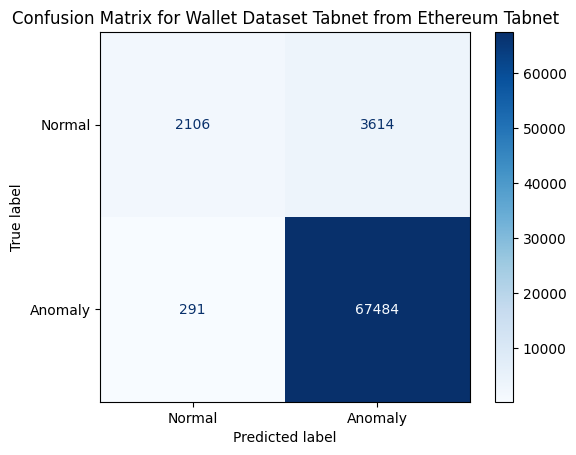

Accuracy: 0.9469
Precision: 0.9492
Recall: 0.9957
F1 Score: 0.9719
ROC AUC: 0.9370


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    roc_auc_score
)

# Step 1: Load Pretrained Ethereum Model
model_path_ethereum = '/content/drive/MyDrive/BlockChainAnomaly/Data/tabnet_Ethereum_model.zip'
tabnet_model_loaded = TabNetClassifier()
tabnet_model_loaded.load_model(model_path_ethereum)

# Step 2: Fine-Tune the Pretrained Model on the Wallet Dataset
tabnet_model_loaded.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_metric=['accuracy'],
    max_epochs=20,  # Adjust as needed
    patience=5,
    batch_size=1024,
    virtual_batch_size=64
)

# Step 3: Evaluate the Fine-Tuned Model on the Wallet Test Dataset
y_pred_wallet = tabnet_model_loaded.predict(X_test)

# Classification Report
print("Classification Report on Wallet Dataset Tabnet from Ethereum Tabnet")
print(classification_report(y_test, y_pred_wallet))

# Confusion Matrix
conf_matrix_wallet = confusion_matrix(y_test, y_pred_wallet)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_wallet, display_labels=['Normal', 'Anomaly'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Wallet Dataset Tabnet from Ethereum Tabnet')
plt.show()

# Metrics
accuracy = accuracy_score(y_test, y_pred_wallet)
precision = precision_score(y_test, y_pred_wallet)
recall = recall_score(y_test, y_pred_wallet)
f1 = f1_score(y_test, y_pred_wallet)

# Use probabilities for ROC AUC
y_pred_proba_wallet = tabnet_model_loaded.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba_wallet)

# Print Evaluation Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
epoch 0  | loss: 0.2033  | val_0_accuracy: 0.92926 | val_1_accuracy: 0.92929 |  0:00:26s
epoch 1  | loss: 0.16021 | val_0_accuracy: 0.93212 | val_1_accuracy: 0.93219 |  0:00:54s
epoch 2  | loss: 0.15414 | val_0_accuracy: 0.93671 | val_1_accuracy: 0.93654 |  0:01:21s
epoch 3  | loss: 0.15038 | val_0_accuracy: 0.93861 | val_1_accuracy: 0.93877 |  0:01:48s
epoch 4  | loss: 0.14622 | val_0_accuracy: 0.94698 | val_1_accuracy: 0.94687 |  0:02:15s
epoch 5  | loss: 0.14243 | val_0_accuracy: 0.9392  | val_1_accuracy: 0.9393  |  0:02:42s
epoch 6  | loss: 0.13919 | val_0_accuracy: 0.93779 | val_1_accuracy: 0.93771 |  0:03:09s
epoch 7  | loss: 0.13448 | val_0_accuracy: 0.92941 | val_1_accuracy: 0.92978 |  0:03:36s
epoch 8  | loss: 0.13246 | val_0_accuracy: 0.92773 | val_1_accuracy: 0.92797 |  0:04:03s
epoch 9  | loss: 0.12913 | val_0_accuracy: 0.93064 | val_1_accuracy: 0

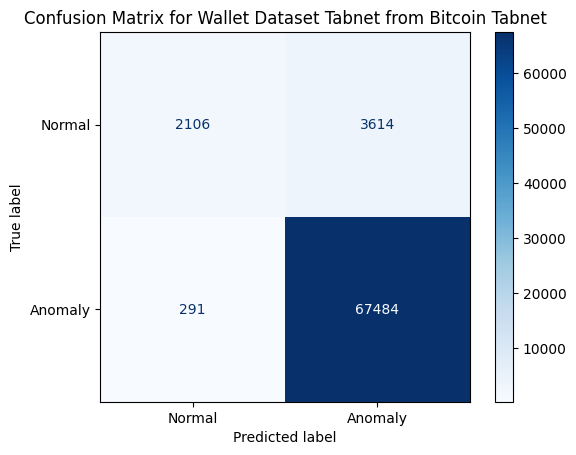

Accuracy: 0.9469
Precision: 0.9492
Recall: 0.9957
F1 Score: 0.9719
ROC AUC: 0.9370


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    roc_auc_score
)

# Step 1: Load Pretrained Ethereum Model
model_path_ethereum = '/content/drive/MyDrive/BlockChainAnomaly/Data/tabnet_bitcoin_model.zip'
tabnet_model2_loaded = TabNetClassifier()
tabnet_model2_loaded.load_model(model_path_ethereum)

# Step 2: Fine-Tune the Pretrained Model on the Wallet Dataset
tabnet_model2_loaded.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_metric=['accuracy'],
    max_epochs=20,  # Adjust as needed
    patience=5,
    batch_size=1024,
    virtual_batch_size=64
)

# Step 3: Evaluate the Fine-Tuned Model on the Wallet Test Dataset
y_pred_wallet = tabnet_model2_loaded.predict(X_test)

# Classification Report
print("Classification Report on Wallet Dataset Tabnet from Bitcoin Tabnet")
print(classification_report(y_test, y_pred_wallet))

# Confusion Matrix
conf_matrix_wallet = confusion_matrix(y_test, y_pred_wallet)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_wallet, display_labels=['Normal', 'Anomaly'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Wallet Dataset Tabnet from Bitcoin Tabnet')
plt.show()

# Metrics
accuracy = accuracy_score(y_test, y_pred_wallet)
precision = precision_score(y_test, y_pred_wallet)
recall = recall_score(y_test, y_pred_wallet)
f1 = f1_score(y_test, y_pred_wallet)

# Use probabilities for ROC AUC
y_pred_proba_wallet = tabnet_model2_loaded.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba_wallet)

# Print Evaluation Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


# **Transfer Learining from bitcoin Dataset cnn model**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Pre-trained Bitcoin CNN model loaded.
Skipping incompatible layer 'dense_6': Layer dense_6 weight shape (64, 1) is not compatible with provided weight shape (128, 32).
Epoch 1/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9398 - loss: 0.1678 - val_accuracy: 0.9531 - val_loss: 0.1312
Epoch 2/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9521 - loss: 0.1329 - val_accuracy: 0.9547 - val_loss: 0.1292
Epoch 3/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9554 - loss: 0.1273 - val_accuracy: 0.9534 - val_loss: 0.1270
Epoch 4/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9569 - loss: 0.1227 - val_accuracy: 0.9605 - val_loss: 0.1136
Epoch 5/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9581 - loss: 0.1176 - val_accuracy: 0.9620 - val_loss: 0.1100
Epoch 6/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9603 - loss: 0.1126 - val_accuracy: 0.9630 - val_loss: 0.1075
Epoch 7/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 11s 

Fine-tuned Wallet CNN Accuracy: 96.27%
Fine-tuned Wallet CNN model saved to: /content/drive/MyDrive/BlockChainAnomaly/Data/wallet_cnn_model_fine_tuned.h5
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


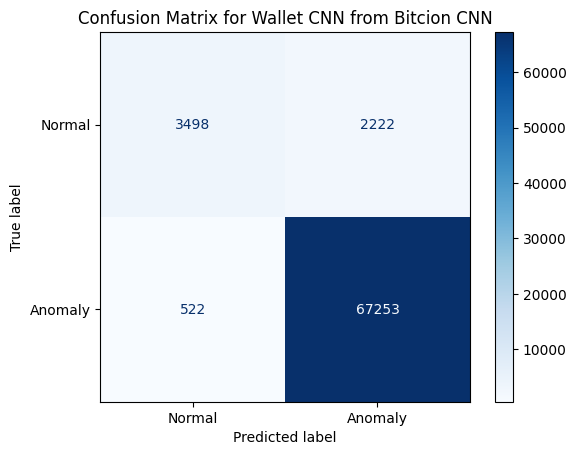

Confusion Matrix:
[[ 3498  2222]
 [  522 67253]]
Accuracy: 0.9627
Precision: 0.9680
Recall: 0.9923
F1 Score: 0.9800
ROC AUC: 0.9679


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Load and preprocess the Wallet dataset
file_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/wallets_features_classes_combined.csv'
df1 = pd.read_csv(file_path, sep=',')

# Map the target values: 1 -> 0, 2 -> 1, and drop rows with value 3
df1 = df1[df1['class'] != 3]  # Filter out rows where target is 3
df1['class'] = df1['class'].map({1: 0, 2: 1})

# Features and target
X = df1.drop(columns=['class', 'address'])  # Drop the address column
y = df1['class']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=10, stratify=y
)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for Conv1D
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Load the pre-trained Bitcoin CNN model
bitcoin_cnn_model_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/cnn_bitcoin_model.h5'
bitcoin_cnn_model = models.load_model(bitcoin_cnn_model_path)
print("Pre-trained Bitcoin CNN model loaded.")

# Create a new CNN model for Wallet data
wallet_cnn_model = models.Sequential([
    layers.Conv1D(64, 3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),  # Match Bitcoin model
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Check and transfer weights only for compatible layers
for layer, bitcoin_layer in zip(wallet_cnn_model.layers, bitcoin_cnn_model.layers):
    try:
        if isinstance(layer, (layers.Conv1D, layers.Dense)) and bitcoin_layer.get_weights():
            layer.set_weights(bitcoin_layer.get_weights())
            layer.trainable = False  # Freeze the layers
    except ValueError as e:
        print(f"Skipping incompatible layer '{layer.name}': {e}")

# Compile the Wallet CNN model
wallet_cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Wallet CNN model on Wallet data
history_wallet_cnn = wallet_cnn_model.fit(
    X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2
)

# Unfreeze layers for fine-tuning
for layer in wallet_cnn_model.layers:
    layer.trainable = True


# Evaluate the model
cnn_loss, cnn_acc = wallet_cnn_model.evaluate(X_test_reshaped, y_test)
print(f"Fine-tuned Wallet CNN Accuracy: {cnn_acc * 100:.2f}%")

# Save the fine-tuned Wallet CNN model
wallet_cnn_model_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/wallet_cnn_model_fine_tuned.h5'
wallet_cnn_model.save(wallet_cnn_model_path)
print(f"Fine-tuned Wallet CNN model saved to: {wallet_cnn_model_path}")

# Generate predictions
y_pred_prob = wallet_cnn_model.predict(X_test_reshaped).ravel()  # Get probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal', 'Anomaly'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Wallet CNN from Bitcion CNN')
plt.show()

# Print confusion matrix values
print("Confusion Matrix:")
print(conf_matrix)

# Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Pre-trained Bitcoin NN model loaded.
Skipping incompatible layer 'dense_7': Layer dense_7 weight shape (56, 128) is not compatible with provided weight shape (7, 64).
Skipping incompatible layer 'dense_8': Layer dense_8 weight shape (128, 64) is not compatible with provided weight shape (64, 32).
Skipping incompatible layer 'dense_9': Layer dense_9 weight shape (64, 1) is not compatible with provided weight shape (32, 1).
Epoch 1/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9388 - loss: 0.1808 - val_accuracy: 0.9515 - val_loss: 0.1342
Epoch 2/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9491 - loss: 0.1419 - val_accuracy: 0.9545 - val_loss: 0.1235
Epoch 3/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9524 - loss: 0.1341 - val_accuracy: 0.9562 - val_loss: 0.1221
Epoch 4/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9543 - loss: 0.1290 - val_accuracy: 0.9575 - val_loss: 0.1188
Epoch 5/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/

Fine-tuned Wallet NN Accuracy: 96.18%
Fine-tuned Wallet NN model saved to: /content/drive/MyDrive/BlockChainAnomaly/Data/wallet_nn_model_fine_tuned.h5
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 2s 985us/step


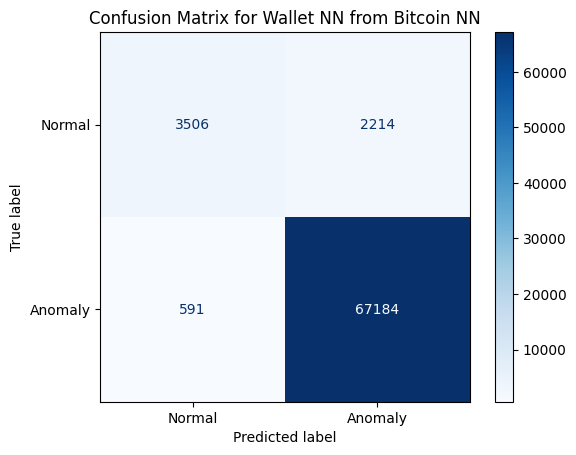

Confusion Matrix:
[[ 3506  2214]
 [  591 67184]]
Accuracy: 0.9618
Precision: 0.9681
Recall: 0.9913
F1 Score: 0.9796
ROC AUC: 0.9643


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Load and preprocess the Wallet dataset
file_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/wallets_features_classes_combined.csv'
df1 = pd.read_csv(file_path, sep=',')

# Map the target values: 1 -> 0, 2 -> 1, and drop rows with value 3
df1 = df1[df1['class'] != 3]  # Filter out rows where target is 3
df1['class'] = df1['class'].map({1: 0, 2: 1})

# Features and target
X = df1.drop(columns=['class', 'address'])  # Drop the address column
y = df1['class']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=10, stratify=y
)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Load the pre-trained Bitcoin NN model
bitcoin_nn_model_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/nn_bitcoin_model.h5'
bitcoin_nn_model = models.load_model(bitcoin_nn_model_path)
print("Pre-trained Bitcoin NN model loaded.")

# Create a new NN model for Wallet data
wallet_nn_model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Match Bitcoin model
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Transfer weights from Bitcoin NN to Wallet NN
for layer, bitcoin_layer in zip(wallet_nn_model.layers, bitcoin_nn_model.layers):
    try:
        if isinstance(layer, layers.Dense):
            layer.set_weights(bitcoin_layer.get_weights())
            layer.trainable = False  # Freeze the layers
    except ValueError as e:
        print(f"Skipping incompatible layer '{layer.name}': {e}")

# Compile the Wallet NN model
wallet_nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Wallet NN model on Wallet data
history_wallet_nn = wallet_nn_model.fit(
    X_train, y_train, epochs=10, batch_size=32, validation_split=0.2
)

# Unfreeze layers for fine-tuning
for layer in wallet_nn_model.layers:
    layer.trainable = True

# Evaluate the model
nn_loss, nn_acc = wallet_nn_model.evaluate(X_test, y_test)
print(f"Fine-tuned Wallet NN Accuracy: {nn_acc * 100:.2f}%")

# Save the fine-tuned Wallet NN model
wallet_nn_model_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/wallet_nn_model_fine_tuned.h5'
wallet_nn_model.save(wallet_nn_model_path)
print(f"Fine-tuned Wallet NN model saved to: {wallet_nn_model_path}")

# Generate predictions
y_pred_prob = wallet_nn_model.predict(X_test).ravel()  # Get probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal', 'Anomaly'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Wallet NN from Bitcoin NN')
plt.show()

# Print confusion matrix values
print("Confusion Matrix:")
print(conf_matrix)

# Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Pre-trained Bitcoin CNN model loaded.
Skipping incompatible layer 'conv1d_2': Layer conv1d_2 weight shape (3, 1, 64) is not compatible with provided weight shape (3, 1, 32).
Skipping incompatible layer 'dense_10': Layer dense_10 weight shape (1728, 64) is not compatible with provided weight shape (64, 64).
Epoch 1/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9334 - loss: 0.1774 - val_accuracy: 0.9491 - val_loss: 0.1436
Epoch 2/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9489 - loss: 0.1413 - val_accuracy: 0.9537 - val_loss: 0.1283
Epoch 3/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9514 - loss: 0.1315 - val_accuracy: 0.9549 - val_loss: 0.1237
Epoch 4/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9532 - loss: 0.1270 - val_accuracy: 0.9555 - val_loss: 0.1183
Epoch 5/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9553 - loss: 0.1192 - val_accuracy: 0.9579 - val_loss: 0.1182
Epoch 6/10
7350/7350 ━━━━━━━━━━━━━━━━

Fine-tuned Wallet CNN Accuracy: 96.04%
Fine-tuned Wallet CNN model saved to: /content/drive/MyDrive/BlockChainAnomaly/Data/wallet_cnn_model_fine_tuned.h5
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


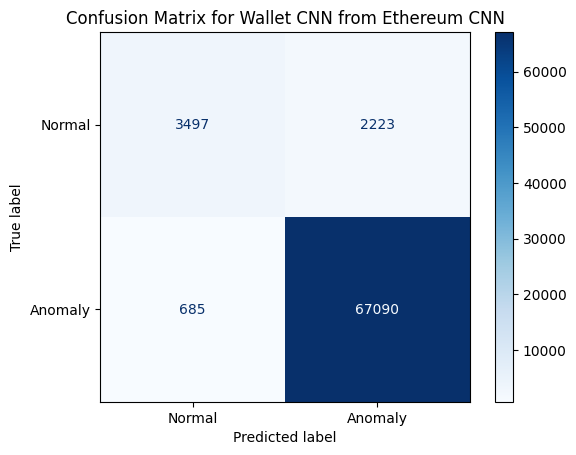

Confusion Matrix:
[[ 3497  2223]
 [  685 67090]]
Accuracy: 0.9604
Precision: 0.9679
Recall: 0.9899
F1 Score: 0.9788
ROC AUC: 0.9658


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Load and preprocess the Wallet dataset
file_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/wallets_features_classes_combined.csv'
df1 = pd.read_csv(file_path, sep=',')

# Map the target values: 1 -> 0, 2 -> 1, and drop rows with value 3
df1 = df1[df1['class'] != 3]  # Filter out rows where target is 3
df1['class'] = df1['class'].map({1: 0, 2: 1})

# Features and target
X = df1.drop(columns=['class', 'address'])  # Drop the address column
y = df1['class']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=10, stratify=y
)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for Conv1D
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Load the pre-trained Bitcoin CNN model
bitcoin_cnn_model_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/cnn_Ethereum_model.h5'
bitcoin_cnn_model = models.load_model(bitcoin_cnn_model_path)
print("Pre-trained Bitcoin CNN model loaded.")

# Create a new CNN model for Wallet data
wallet_cnn_model = models.Sequential([
    layers.Conv1D(64, 3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),  # Match Bitcoin model
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Check and transfer weights only for compatible layers
for layer, bitcoin_layer in zip(wallet_cnn_model.layers, bitcoin_cnn_model.layers):
    try:
        if isinstance(layer, (layers.Conv1D, layers.Dense)) and bitcoin_layer.get_weights():
            layer.set_weights(bitcoin_layer.get_weights())
            layer.trainable = False  # Freeze the layers
    except ValueError as e:
        print(f"Skipping incompatible layer '{layer.name}': {e}")

# Compile the Wallet CNN model
wallet_cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Wallet CNN model on Wallet data
history_wallet_cnn = wallet_cnn_model.fit(
    X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2
)

# Unfreeze layers for fine-tuning
for layer in wallet_cnn_model.layers:
    layer.trainable = True


# Evaluate the model
cnn_loss, cnn_acc = wallet_cnn_model.evaluate(X_test_reshaped, y_test)
print(f"Fine-tuned Wallet CNN Accuracy: {cnn_acc * 100:.2f}%")

# Save the fine-tuned Wallet CNN model
wallet_cnn_model_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/wallet_cnn_model_fine_tuned.h5'
wallet_cnn_model.save(wallet_cnn_model_path)
print(f"Fine-tuned Wallet CNN model saved to: {wallet_cnn_model_path}")

# Generate predictions
y_pred_prob = wallet_cnn_model.predict(X_test_reshaped).ravel()  # Get probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal', 'Anomaly'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Wallet CNN from Ethereum CNN')
plt.show()

# Print confusion matrix values
print("Confusion Matrix:")
print(conf_matrix)

# Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Pre-trained Bitcoin NN model loaded.
Skipping incompatible layer 'dense_12': Layer dense_12 weight shape (56, 128) is not compatible with provided weight shape (7, 128).
Epoch 1/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8964 - loss: 0.2861 - val_accuracy: 0.9482 - val_loss: 0.1471
Epoch 2/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9445 - loss: 0.1577 - val_accuracy: 0.9523 - val_loss: 0.1363
Epoch 3/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9463 - loss: 0.1517 - val_accuracy: 0.9517 - val_loss: 0.1291
Epoch 4/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9483 - loss: 0.1458 - val_accuracy: 0.9539 - val_loss: 0.1267
Epoch 5/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9493 - loss: 0.1421 - val_accuracy: 0.9553 - val_loss: 0.1217
Epoch 6/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9508 - loss: 0.1380 - val_accuracy: 0.9532 - val_loss: 0.1221
Epoch 7/10
7350/7350 ━━━━━━━━━━━━━━━━━━━━ 11

Fine-tuned Wallet NN Accuracy: 95.53%
Fine-tuned Wallet NN model saved to: /content/drive/MyDrive/BlockChainAnomaly/Data/wallet_nn_model_fine_tuned.h5
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


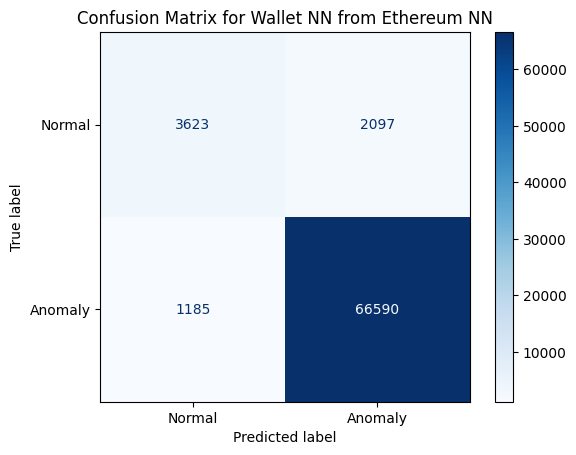

Confusion Matrix:
[[ 3623  2097]
 [ 1185 66590]]
Accuracy: 0.9553
Precision: 0.9695
Recall: 0.9825
F1 Score: 0.9759
ROC AUC: 0.9560


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Load and preprocess the Wallet dataset
file_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/wallets_features_classes_combined.csv'
df1 = pd.read_csv(file_path, sep=',')

# Map the target values: 1 -> 0, 2 -> 1, and drop rows with value 3
df1 = df1[df1['class'] != 3]  # Filter out rows where target is 3
df1['class'] = df1['class'].map({1: 0, 2: 1})

# Features and target
X = df1.drop(columns=['class', 'address'])  # Drop the address column
y = df1['class']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=10, stratify=y
)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Load the pre-trained Bitcoin NN model
bitcoin_nn_model_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/nn_Ethereum_model.h5'
bitcoin_nn_model = models.load_model(bitcoin_nn_model_path)
print("Pre-trained Bitcoin NN model loaded.")

# Create a new NN model for Wallet data
wallet_nn_model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Match Bitcoin model
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Transfer weights from Bitcoin NN to Wallet NN
for layer, bitcoin_layer in zip(wallet_nn_model.layers, bitcoin_nn_model.layers):
    try:
        if isinstance(layer, layers.Dense):
            layer.set_weights(bitcoin_layer.get_weights())
            layer.trainable = False  # Freeze the layers
    except ValueError as e:
        print(f"Skipping incompatible layer '{layer.name}': {e}")

# Compile the Wallet NN model
wallet_nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Wallet NN model on Wallet data
history_wallet_nn = wallet_nn_model.fit(
    X_train, y_train, epochs=10, batch_size=32, validation_split=0.2
)

# Unfreeze layers for fine-tuning
for layer in wallet_nn_model.layers:
    layer.trainable = True

# Evaluate the model
nn_loss, nn_acc = wallet_nn_model.evaluate(X_test, y_test)
print(f"Fine-tuned Wallet NN Accuracy: {nn_acc * 100:.2f}%")

# Save the fine-tuned Wallet NN model
wallet_nn_model_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/wallet_nn_model_fine_tuned.h5'
wallet_nn_model.save(wallet_nn_model_path)
print(f"Fine-tuned Wallet NN model saved to: {wallet_nn_model_path}")

# Generate predictions
y_pred_prob = wallet_nn_model.predict(X_test).ravel()  # Get probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal', 'Anomaly'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Wallet NN from Ethereum NN')
plt.show()

# Print confusion matrix values
print("Confusion Matrix:")
print(conf_matrix)

# Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
